In [60]:
import time
import platform
import psutil
import subprocess

start_time = time.time()

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, r2_score, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

data = pd.read_excel("/content/Telco_customer_churn.xlsx")

In [62]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [63]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [64]:
data.shape[0]

7043

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [66]:
data.CustomerID.nunique()

7043

In [67]:
data.Count.value_counts()

,count
Count,
1,7043


In [68]:
data.Country.unique()

array(['United States'], dtype=object)

In [69]:
data.State.value_counts()

,count
State,
California,7043


In [70]:
data.City.nunique()

1129

In [71]:
data.City.value_counts()

,count
City,
Los Angeles,305
San Diego,150
San Jose,112
Sacramento,108
San Francisco,104
...,...
Healdsburg,4
Jenner,4
Philo,4


In [72]:
City_zip_counts = data.groupby('City')['Zip Code'].nunique()
City_zip_counts.sort_values(ascending=False)

,Zip Code
City,
Los Angeles,61
San Diego,30
San Jose,28
Sacramento,27
San Francisco,26
...,...
Happy Camp,1
Harbor City,1
Hat Creek,1


In [73]:
data.Gender.value_counts()

,count
Gender,
Male,3555
Female,3488


In [74]:
data['Senior Citizen'].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


In [75]:
data.Partner.value_counts()

,count
Partner,
No,3641
Yes,3402


In [76]:
data.Dependents.value_counts()

,count
Dependents,
No,5416
Yes,1627


In [77]:
data['Tenure Months'].value_counts()

,count
Tenure Months,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [78]:
data[data['Tenure Months']==0].head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN


In [79]:
data['Phone Service'].value_counts()

,count
Phone Service,
Yes,6361
No,682


In [80]:
data['Multiple Lines'].value_counts()

,count
Multiple Lines,
No,3390
Yes,2971
No phone service,682


In [81]:
data['Internet Service'].value_counts()

,count
Internet Service,
Fiber optic,3096
DSL,2421
No,1526


In [82]:
data['Online Security'].value_counts()

,count
Online Security,
No,3498
Yes,2019
No internet service,1526


In [83]:
data['Online Backup'].value_counts()

,count
Online Backup,
No,3088
Yes,2429
No internet service,1526


In [84]:
data['Device Protection'].value_counts()

,count
Device Protection,
No,3095
Yes,2422
No internet service,1526


In [85]:
data['Tech Support'].value_counts()

,count
Tech Support,
No,3473
Yes,2044
No internet service,1526


In [86]:
data['Streaming TV'].value_counts()

,count
Streaming TV,
No,2810
Yes,2707
No internet service,1526


In [87]:
data['Streaming Movies'].value_counts()

,count
Streaming Movies,
No,2785
Yes,2732
No internet service,1526


In [88]:
data['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [89]:
data['Paperless Billing'].value_counts()

,count
Paperless Billing,
Yes,4171
No,2872


In [90]:
data['Payment Method'].value_counts()

,count
Payment Method,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [91]:
data['Monthly Charges'].value_counts()

,count
Monthly Charges,
20.05,61
19.85,45
19.95,44
19.90,44
19.65,43
...,...
112.55,1
117.15,1
29.40,1


In [92]:
data['Total Charges'].value_counts()

,count
Total Charges,
20.2,11
,11
19.75,9
19.65,8
20.05,8
...,...
444.75,1
5459.2,1
295.95,1


In [93]:
data['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [94]:
data[data['Tenure Months']==0]['Churn Label'].value_counts()

,count
Churn Label,
No,11


In [95]:
data['Churn Score'].value_counts()

,count
Churn Score,
80,151
71,148
77,145
67,143
76,141
...,...
88,33
9,3
8,2


In [96]:
data[data['Tenure Months']==0]['Churn Score'].value_counts()

,count
Churn Score,
36,1
68,1
45,1
48,1
30,1
53,1
49,1
27,1
69,1


In [97]:
data.CLTV.value_counts()

,count
CLTV,
5546,8
4741,7
5527,7
5092,7
4745,7
...,...
2364,1
3003,1
5280,1


In [98]:
data['Churn Reason'].value_counts()

,count
Churn Reason,
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103
Product dissatisfaction,102


# Label Encoding

In [99]:
le = LabelEncoder()

In [100]:
data['City'] = le.fit_transform(data['City'])

In [101]:
data['Zip Code'] = le.fit_transform(data['Zip Code'])

In [102]:
senior_citizen_mapping = {
    'Yes': 1,
    'No': -1
}

data['Senior Citizen'] = data['Senior Citizen'].replace(senior_citizen_mapping)

In [103]:
Partner_mapping = {
    'Yes': 1,
    'No': -1
}

data['Partner'] = data['Partner'].replace(Partner_mapping)

In [104]:
Dependents_mapping = {
    'Yes': 1,
    'No': -1
}

data['Dependents'] = data['Dependents'].replace(Dependents_mapping)

In [105]:
Phone_service_mapping = {
    'Yes': 1,
    'No': -1
}

data['Phone Service'] = data['Phone Service'].replace(Phone_service_mapping)

In [106]:
lines_mapping = {
    'No phone service': -2,
    'Yes': 3,
    'No': -1
}

data['Multiple Lines'] = data['Multiple Lines'].replace(lines_mapping)

In [107]:
Internet_service_mapping = {
    'Fiber optic': 5,
    'DSL': 2,
    'No': -1
}

data['Internet Service'] = data['Internet Service'].replace(Internet_service_mapping)

In [108]:
Security_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Online Security'] = data['Online Security'].replace(Security_mapping)

In [109]:
Backup_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Online Backup'] = data['Online Backup'].replace(Backup_mapping)

In [110]:
Protection_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Device Protection'] = data['Device Protection'].replace(Protection_mapping)

In [111]:
Tech_support_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Tech Support'] = data['Tech Support'].replace(Tech_support_mapping)

In [112]:
TV_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Streaming TV'] = data['Streaming TV'].replace(TV_mapping)

In [113]:
movies_mapping = {
    'No internet service': -2,
    'Yes': 2,
    'No': -1
}

data['Streaming Movies'] = data['Streaming Movies'].replace(movies_mapping)

In [114]:
contract_mapping = {
    'Month-to-month': -1,
    'Two year': 5,
    'One year': 3
}

data['Contract'] = data['Contract'].replace(contract_mapping)

In [115]:
Billing_mapping = {
    'Yes': 1,
    'No': -1
}

data['Paperless Billing'] = data['Paperless Billing'].replace(Billing_mapping)

In [116]:
payment_mapping = {
    'Electronic check': 0.7,
    'Mailed check': 0.2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 5
}

data['Payment Method'] = data['Payment Method'].replace(payment_mapping)

In [117]:
data['CLTV'] = (data['CLTV'] - data['CLTV'].min()) / (data['CLTV'].max() - data['CLTV'].min())

In [118]:

data['Total Charges'] = data['Total Charges'].replace(' ', np.nan)
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')
data['Total Charges'].fillna(data['Total Charges'].mean(), inplace=True)

# Regression

In [119]:
X = data[['City', 'Zip Code', 'Senior Citizen','Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']]

Y = data['Churn Score']

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

In [121]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


param_grids = {
    'Linear Regression': {},
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, None]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    }
}

In [122]:
best_r2_scores = {}
test_r2_scores = {}
best_params = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    pipeline.set_params(model=model)
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='r2')
    grid_search.fit(X_train, Y_train)

    best_r2_scores[model_name] = grid_search.best_score_
    best_params[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    Y_pred = best_model.predict(X_test)
    test_r2_scores[model_name] = r2_score(Y_test, Y_pred)

Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...


In [123]:
print("Best R-squared scores from cross-validation for each model:")
for model_name, r2_score_val in best_r2_scores.items():
    print(f"{model_name}: {r2_score_val}")

print("\nR-squared scores on the test data for each model:")
for model_name, r2_score_val in test_r2_scores.items():
    print(f"{model_name}: {r2_score_val}")

Best R-squared scores from cross-validation for each model:
Linear Regression: 0.1241650959651324
Random Forest: 0.12134526270634668
Gradient Boosting: 0.128174088271644

R-squared scores on the test data for each model:
Linear Regression: 0.11701172452012754
Random Forest: 0.09868876851360242
Gradient Boosting: 0.12199431130246408


In [124]:
print("\nBest parameters found by GridSearchCV for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Best parameters found by GridSearchCV for each model:
Linear Regression: {}
Random Forest: {'model__max_depth': 10, 'model__n_estimators': 200}
Gradient Boosting: {'model__learning_rate': 0.01, 'model__n_estimators': 200}


# Classification

In [125]:
X = data[['City', 'Zip Code', 'Senior Citizen','Partner', 'Dependents', 'Tenure Months', 'Phone Service',
          'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection',
          'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
          'Payment Method', 'Monthly Charges', 'Total Charges']]

Y = data['Churn Label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [126]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LogisticRegression())])

param_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, None]
    },
    'Support Vector Classifier': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1]
    }
}

In [127]:
best_f1_scores = {}
test_scores = {}
best_params = {}

cv = StratifiedKFold(n_splits=3)
for model_name, model in models.items():
    print(f"Training {model_name}...")
    pipeline.set_params(model=model)
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=cv, scoring=make_scorer(f1_score, average='weighted'))
    grid_search.fit(X_train, Y_train)

    best_f1_scores[model_name] = grid_search.best_score_
    best_params[model_name] = grid_search.best_params_
    best_model = grid_search.best_estimator_
    Y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    test_scores[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}

Training Logistic Regression...
Training Random Forest...
Training Support Vector Classifier...
Training Gradient Boosting...


In [128]:
print("Best F1 scores from cross-validation for each model:")
for model_name, f1_score_val in best_f1_scores.items():
    print(f"{model_name}: {f1_score_val:.4f}")

print("\nAccuracy and F1 scores on the test data for each model:")
for model_name, scores in test_scores.items():
    print(f"{model_name} - Accuracy: {scores['Accuracy']:.4f}, F1 Score: {scores['F1 Score']:.4f}")

Best F1 scores from cross-validation for each model:
Logistic Regression: 0.8075
Random Forest: 0.8014
Support Vector Classifier: 0.8041
Gradient Boosting: 0.8101

Accuracy and F1 scores on the test data for each model:
Logistic Regression - Accuracy: 0.8013, F1 Score: 0.7983
Random Forest - Accuracy: 0.7984, F1 Score: 0.7901
Support Vector Classifier - Accuracy: 0.8013, F1 Score: 0.7971
Gradient Boosting - Accuracy: 0.7949, F1 Score: 0.7890


In [129]:
print("\nBest parameters found by GridSearchCV for each model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Best parameters found by GridSearchCV for each model:
Logistic Regression: {'model__C': 10}
Random Forest: {'model__max_depth': 10, 'model__n_estimators': 200}
Support Vector Classifier: {'model__C': 10, 'model__kernel': 'linear'}
Gradient Boosting: {'model__learning_rate': 0.1, 'model__n_estimators': 100}


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

New = pd.read_excel("/content/Telco_customer_churn.xlsx")
indices_1 = data[(data['Churn Label'] == 'Yes') & (data['CLTV'] > 0.7)].index
Priority_High = New.loc[indices_1]

indices_safe = data[(data['Churn Label'] == 'No') & (data['CLTV'] < 0.3)].index
safe = New.loc[indices_safe]

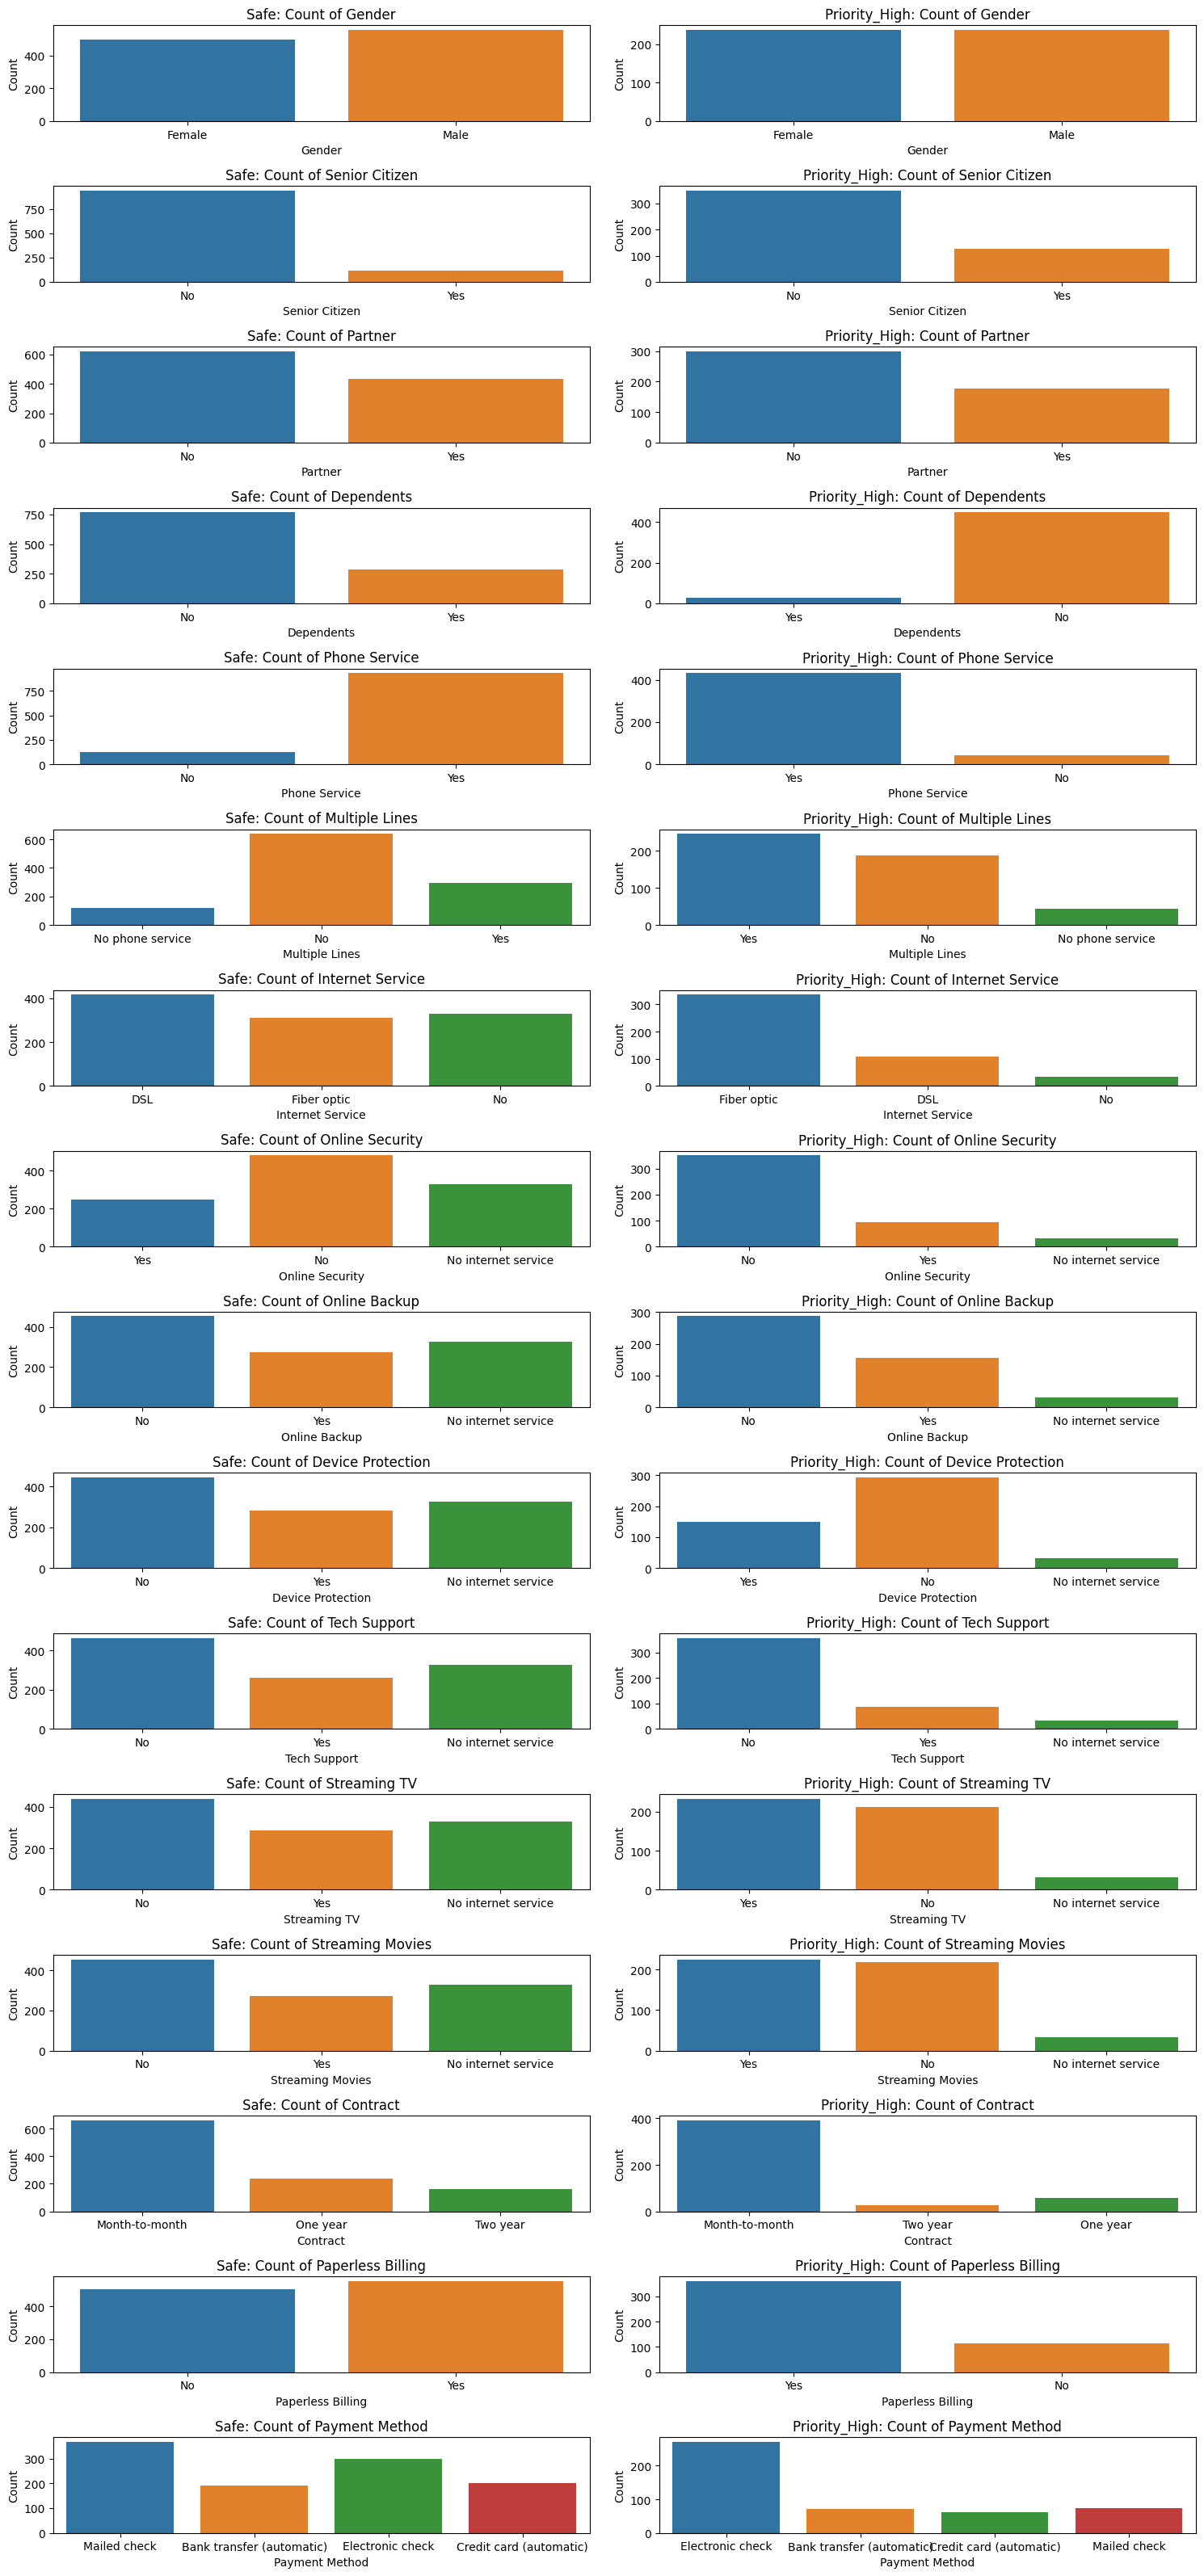

In [131]:
columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
           'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
           'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
           'Contract', 'Paperless Billing', 'Payment Method']


n_features = len(columns)
n_cols = 2
n_rows = n_features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 2))
for i, feature in enumerate(columns):
    sns.countplot(x=feature, data=safe, ax=axes[i, 0], hue=feature, dodge=False, legend=False)
    axes[i, 0].set_title(f'Safe: Count of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Count')

    sns.countplot(x=feature, data=Priority_High, ax=axes[i, 1], hue=feature, dodge=False, legend=False)
    axes[i, 1].set_title(f'Priority_High: Count of {feature}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Count')


plt.savefig('/content/feature_comparison.png', format='png', bbox_inches='tight')
plt.tight_layout()
plt.show()

* **Gender:** The distribution between genders is fairly balanced.
* **Senior Citizens:**  Implement targeted support for senior citizens, such as easier-to-understand service explanations, dedicated customer service, or special discounts.
* **Partner:** Create community-based or referral programs that encourage social sharing and usage of services with friends or family.
* **Dependents:** Introduce family or multi-user plans that provide better value for customers with dependents. For those without dependents, focus on personal usage benefits to retain them.
* **Phone Service:** Improve service reliability, offer bundled discounts, or enhance customer support.
* **Multiple Lines:** Ensure that customers with multiple lines are getting good value for money. Introduce flexible multi-line plans or discounts.
* **Internet Service:** improve service reliability or offer promotions.
* **Online Security, Backup, and Device Protection::** Promote these additional services as part of a bundled package, highlighting their value.
* **Tech Support:**  Continue offering high-quality tech support and consider proactive outreach to customers.
* **Streaming TV and Movies:** Offer personalized recommendations and ensure content variety to keep customers engaged.
* **Contract:** Encourage longer-term contracts by offering discounts or benefits. Customers on month-to-month contracts are more likely to churn, so providing incentives to switch could help reduce churn.
* **Payment Method:**  Introduce rewards or loyalty programs for customers using more stable payment methods like bank transfers or credit cards.


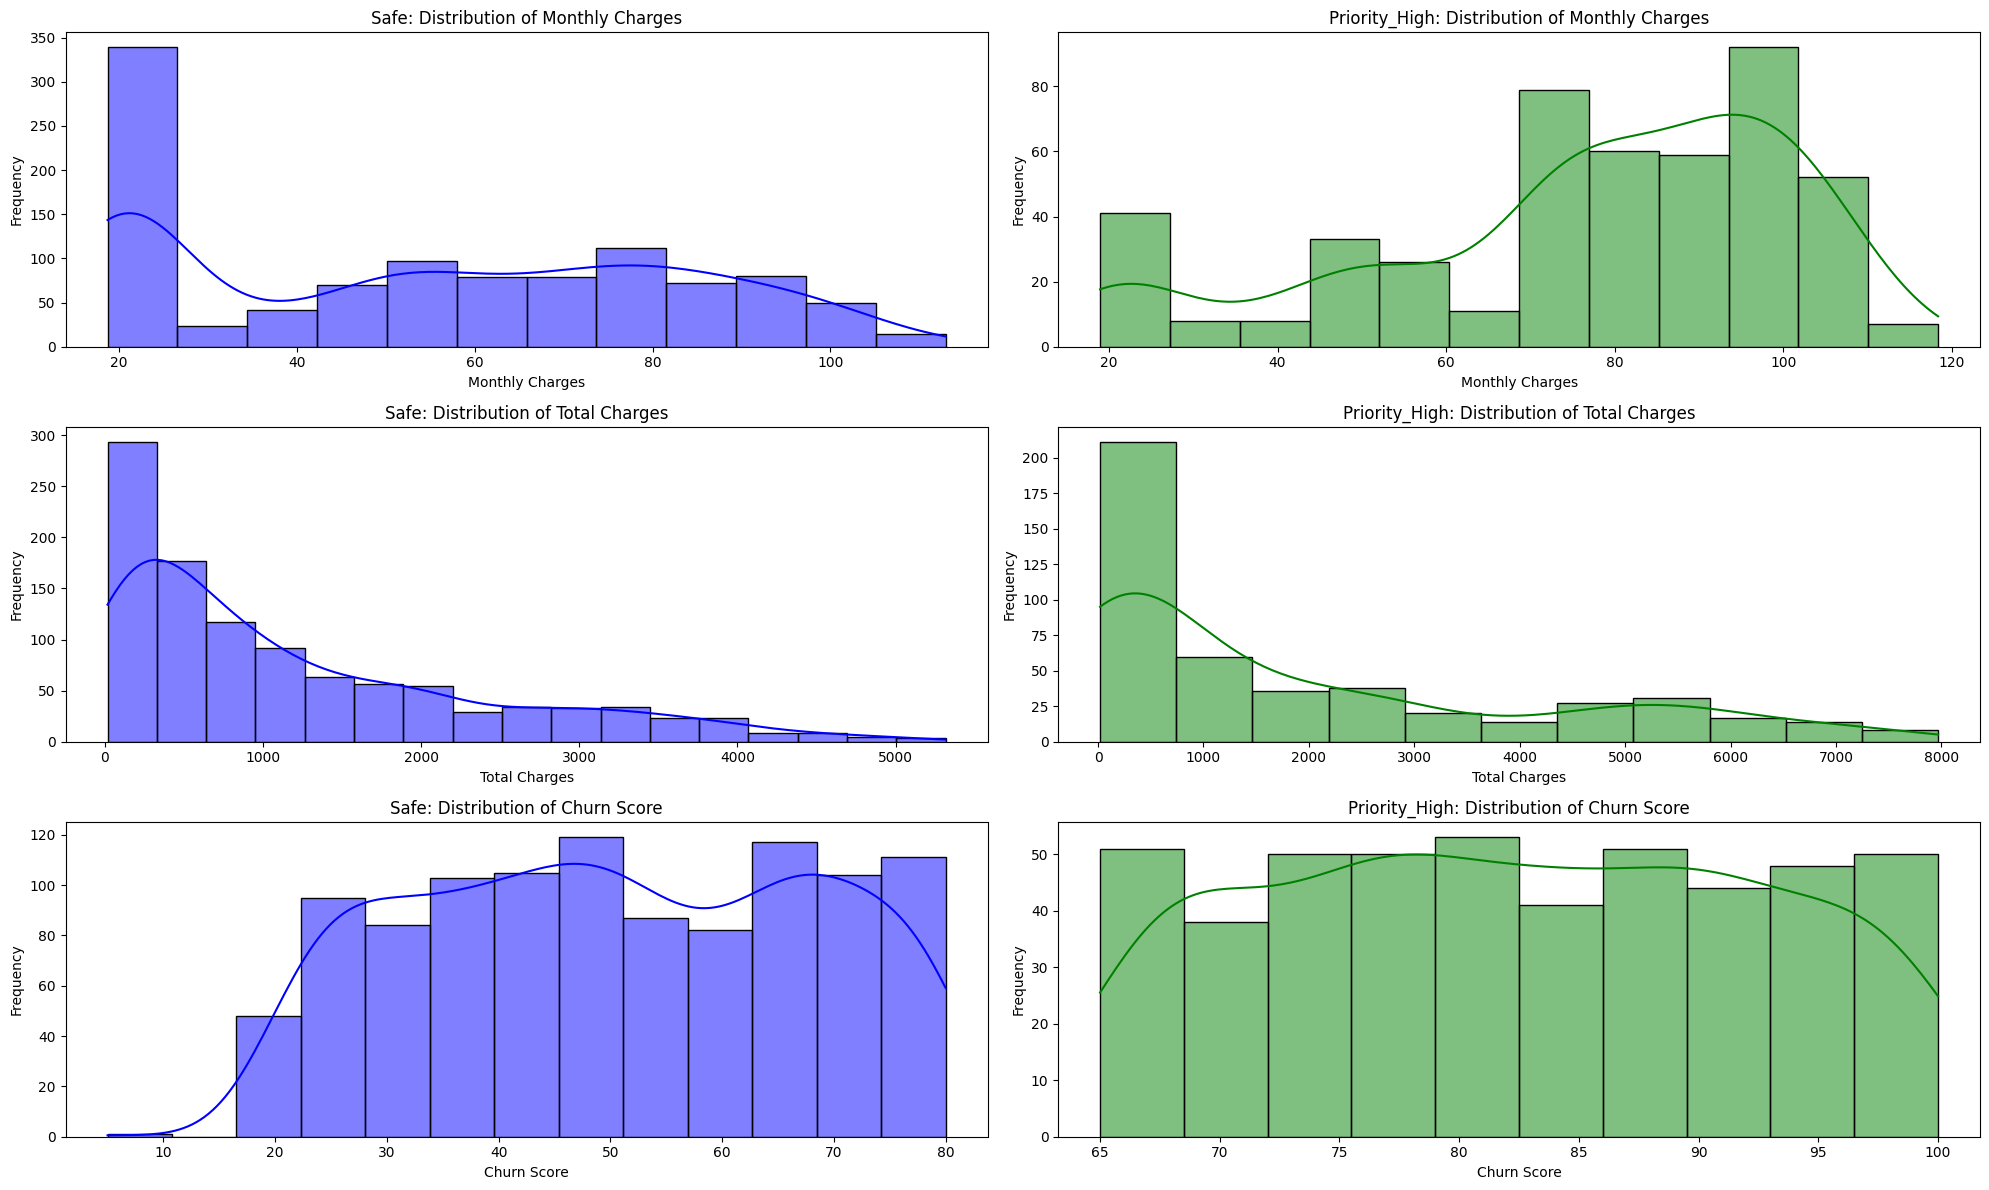

In [132]:
safe['Total Charges'] = safe['Total Charges'].replace(' ', np.nan)
safe['Total Charges'] = pd.to_numeric(safe['Total Charges'], errors='coerce')
safe['Total Charges'].fillna(safe['Total Charges'].mean(), inplace=True)

Priority_High['Total Charges'] = Priority_High['Total Charges'].replace(' ', np.nan)
Priority_High['Total Charges'] = pd.to_numeric(Priority_High['Total Charges'], errors='coerce')
Priority_High['Total Charges'].fillna(Priority_High['Total Charges'].mean(), inplace=True)


numerical_features = ['Monthly Charges', 'Total Charges', 'Churn Score']
n_features = len(numerical_features)
n_cols = 2
n_rows = n_features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
for i, feature in enumerate(numerical_features):
    sns.histplot(safe[feature], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Safe: Distribution of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')

    sns.histplot(Priority_High[feature], kde=True, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Priority_High: Distribution of {feature}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

* **Monthly Charges:**  The majority of customers in the "Safe" group have lower monthly charges,"Priority_High" group have a more dispersed distribution, with significant numbers paying higher monthly charges.
* **Total Charges::**  Most "Safe" customers have accumulated lower total charges, indicating that they are either newer customers or have chosen lower-cost plans. The distribution in the "Priority_High" group is more uniform across all charge ranges.

In [133]:
latitude = pd.concat([safe['Latitude'], Priority_High['Latitude']]).mean()
longitude = pd.concat([safe['Longitude'], Priority_High['Longitude']]).mean()
m = folium.Map(location=[latitude, longitude], zoom_start=6.5)

safe_cluster = MarkerCluster(name='Safe Locations').add_to(m)
priority_high_cluster = MarkerCluster(name='Priority High Locations').add_to(m)


for _, row in safe.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Safe Location: City {row['City']}, Zip Code {row['Zip Code']}",
        icon=folium.Icon(color='blue')
    ).add_to(safe_cluster)

for _, row in Priority_High.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Priority High Location: City {row['City']}, Zip Code {row['Zip Code']}",
        icon=folium.Icon(color='red')
    ).add_to(priority_high_cluster)

folium.LayerControl().add_to(m)

m.save("clustered_map_with_city.html")
m

In [134]:
time.sleep(5)
end_time = time.time()
elapsed_time = end_time - start_time
processor_info = platform.processor()
cpu_info = subprocess.check_output("cat /proc/cpuinfo | grep 'model name' | uniq", shell=True).decode().strip()
cores = psutil.cpu_count(logical=False)
logical_cores = psutil.cpu_count(logical=True)
cpu_freq = psutil.cpu_freq().current
print(f"Start Time: {time.ctime(start_time)}")
print(f"End Time: {time.ctime(end_time)}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print(f"Processor: {processor_info}")
print(f"CPU Info: {cpu_info}")
print(f"Physical Cores: {cores}, Logical Cores: {logical_cores}")
print(f"CPU Frequency: {cpu_freq:.2f} MHz")

Start Time: Sat Aug 17 02:08:59 2024
End Time: Sat Aug 17 02:14:15 2024
Elapsed Time: 316.38 seconds
Processor: x86_64
CPU Info: model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
Physical Cores: 1, Logical Cores: 2
CPU Frequency: 2200.00 MHz
